<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/Copy_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

1. Load in your dataset.

In [1]:
import pandas as pd
df =pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


2. Find out some information about the data...

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [3]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [4]:
df.describe(exclude="number")

,DATE,RAIN
count,25551,25548
unique,25551,2
top,2009-06-13,False
freq,1,14648


In [5]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860684
TMIN,-0.064365,0.860684,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


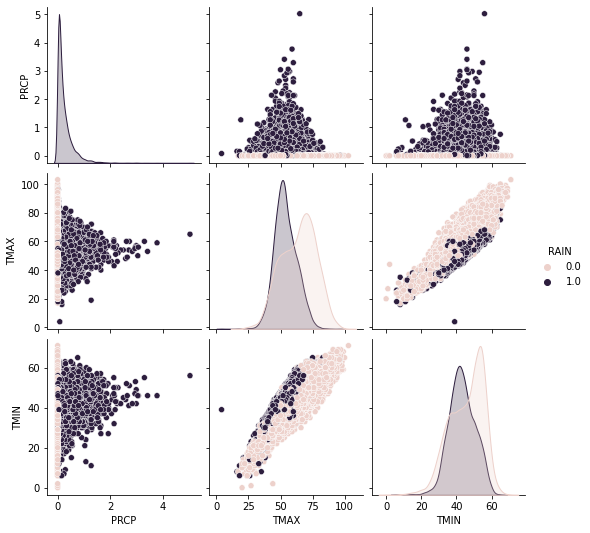

In [7]:
import seaborn as sns
sns.pairplot(df, hue='RAIN');

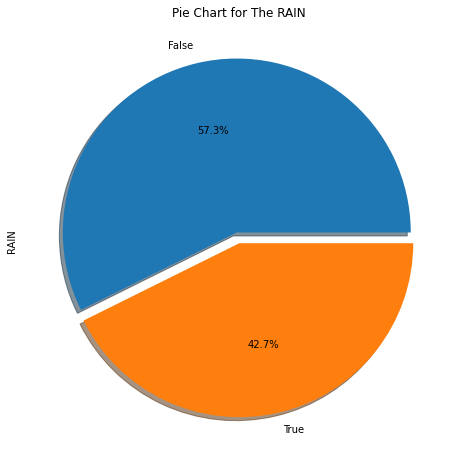

In [8]:
import matplotlib.pyplot as plt

df['RAIN'].value_counts().plot.pie(explode=[0.04650, 0.01688], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The RAIN')
plt.show()

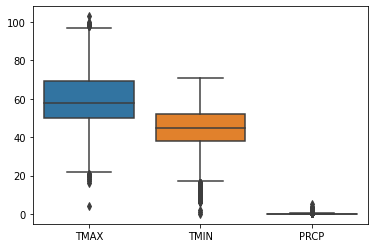

In [9]:
sns.boxplot(data=df[['TMAX', 'TMIN', 'PRCP']])

4. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

In [10]:
df = df.loc[df['RAIN'].isna()==False]
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [11]:
df = df.loc[(df.TMAX<90) & (df.TMIN>17)]

df = df.loc[df.TMAX>20]
df = df.drop("DATE",axis=1)
df

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True
...,...,...,...,...
25546,0.00,49,34,False
25547,0.00,49,29,False
25548,0.00,46,32,False
25549,0.00,48,34,False


5. Split your data into training and testing datasets...

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np


X = df[['PRCP']]  # all the values you want to help predict the target value
y = df.RAIN.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

6. Import, create, and fit a LogisticRegression model with 1 variable

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [14]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [15]:
preds = lr.predict(X_test)
preds

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [16]:
# what do they look like? (show me some of the predictions)
preds[:5]

array([1, 0, 1, 1, 0], dtype=int32)

7. Score your model...
- accuracy_score

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

0.9167492566897919

8. Confustion Matrix

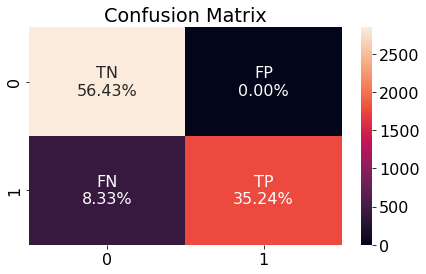

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

preds = lr.predict(X_test)
cf = confusion_matrix(y_test, preds)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
TP = 34.69\
FP = 0.00\
TN = 57,0.9\
FN = 8.23
- What does each mean?
the model predicted that:
 - 57.09 were negative and they were 
 - did not predict positive that were false(wrong)
 - 8.23 were negative but they were not they were(True)
 -  3.4,69 were  positive and they were 


10. Create, and fit a LogisticRegression model with **more than** 1 variable

In [19]:
X = df[['PRCP','TMAX'	,'TMIN']]  # all the values you want to help predict the target value
y = df.RAIN.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

11. Make predictions on your `X_test` values...

In [21]:
pre = lr.predict(X_test)
pre

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [22]:
# what do they look like? (show me some of the predictions)
pre[:5]

array([1, 0, 1, 1, 1], dtype=int32)

12. Score your model...
- accuracy_score


In [23]:
accuracy_score(y_test, lr.predict(X_test))

0.9252725470763132

13.  Confustion Matrix

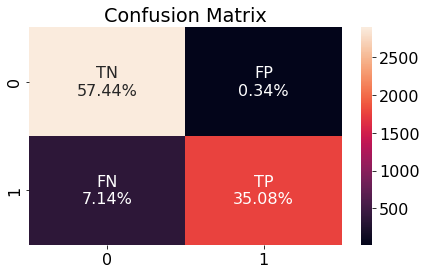

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

preds = lr.predict(X_test)
cf = confusion_matrix(y_test, pre)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

14.  Explain your confusion matrix...
- How many of each value do you have?

TP = 35.50  | 34.69\
FP = 0.30 |0.00\
TN = 57.07 |57,0.9\
FN = 7.14 |8.23
- What does each mean?

 - 57.07 were negative and they were 
 - 0.30 were positive that were false(wrong)
 - 7.14 were negative but they were not they were(True)
 -  35.50 were positive and they were 

your stuff here

your stuff here

15. Which model is better? Why?
the second is slightly more accurate and the TP is better

type your stuff here

## Bonus

16. Perform GridSearchCV with the better data

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

14. Accuracy Score and Confusion Matrix

Did the score change at all? Why?

your stuff here

### Bonus Bonus
Figure out ROC plot. Tell me about it.

your stuff here

your stuff here